In [1]:
## Import packages
import pandas as pd
import joblib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sb

from sklearn.cross_validation import train_test_split
import statsmodels.api as sm 

import sklearn.metrics as skm
from sklearn.metrics import precision_recall_curve, roc_auc_score, roc_curve

/home/kmitchell/anaconda2/envs/py35/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [53]:
feat = pd.read_pickle('features.pkl')

X_all = feat[['perc_in_labor_frc',
      'perc_in_armfrc', 'p_com_workhome', 'perc_occ_mgt',
       'p_ind_edsvc', 'p_ind_pubadm', 
       'p_marrfam', 'p_malehh', 'p_femhh',
       'avg_hh_size', 'fert_age15_19', 
       'p_highsch',  'p_civvet',  'p_civdis_1864',
       'p_civdis_65', 
       'p_nativestate', 'p_nat_citz', 'p_spk_engl'
        ,'ln_housedens' 
         ]]

X_imp = feat[['perc_in_labor_frc', 'perc_occ_mgt',
       'p_ind_edsvc', 'p_marrfam',   'p_femhh',  
       'p_highsch', 'p_civdis_1864', 'p_civdis_65', 
       'p_nat_citz'  
         ]]

X_fin = feat[['perc_in_labor_frc', 'p_marrfam',   'p_femhh',  
       'p_highsch', 'p_civdis_1864', 'p_civdis_65'
         ]]


X_fin2 = feat[['perc_in_labor_frc', 'p_marrfam',   
       'p_highsch'
         ]]


X = X_fin2

X = sm.add_constant(X)
X = X.fillna(0)

numpov = {"high_pov":3 ,"med_high" :2,"med_low":1,"low_pov":0}
feat['pov_bin_num'] = feat['pov_bins'].apply(numpov.get).astype(int)

y = feat['PercBelowPov']/100
y = feat['PercBelowPov']
y = feat['pov_bin']
#y = feat['pov_bin_num']


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=576)

In [55]:
import seaborn as sns
def pr_curve(truthvec, scorevec):
    threshvec = np.unique(scorevec)
    numthresh = len(threshvec)
    tpvec = np.zeros(numthresh)
    fpvec = np.zeros(numthresh)
    fnvec = np.zeros(numthresh)

    for i in range(numthresh):
        thresh = threshvec[i]
        tpvec[i] = sum(truthvec[scorevec>=thresh])
        fpvec[i] = sum(1-truthvec[scorevec>=thresh])
        fnvec[i] = sum(truthvec[scorevec<thresh])
    recallvec = tpvec/(tpvec + fnvec)
    precisionvec = tpvec/(tpvec + fpvec)
    plt.plot(precisionvec,recallvec)
    plt.axis([0, 1, 0, 1])
    plt.xlabel("precision")
    plt.ylabel("recall")
    plt.title("precision/recall curve for final model")
    return (recallvec, precisionvec, threshvec)

Test accuracy =  0.814422057264


(array([ 1.        ,  1.        ,  0.99791667,  0.99583333,  0.99583333,
         0.99583333,  0.99583333,  0.99583333,  0.99375   ,  0.98958333,
         0.9875    ,  0.9875    ,  0.9875    ,  0.98541667,  0.98541667,
         0.98541667,  0.98541667,  0.98541667,  0.98541667,  0.98541667,
         0.98541667,  0.98541667,  0.98333333,  0.98125   ,  0.98125   ,
         0.98125   ,  0.97916667,  0.97916667,  0.97708333,  0.97708333,
         0.975     ,  0.975     ,  0.975     ,  0.97291667,  0.97291667,
         0.97291667,  0.97291667,  0.97291667,  0.97291667,  0.97291667,
         0.97083333,  0.97083333,  0.96875   ,  0.96666667,  0.96666667,
         0.96666667,  0.96666667,  0.96666667,  0.96666667,  0.96666667,
         0.9625    ,  0.96041667,  0.95833333,  0.95833333,  0.95625   ,
         0.95416667,  0.95416667,  0.95      ,  0.94791667,  0.94791667,
         0.94583333,  0.94583333,  0.94583333,  0.94583333,  0.94583333,
         0.94583333,  0.94583333,  0.94583333,  0.9

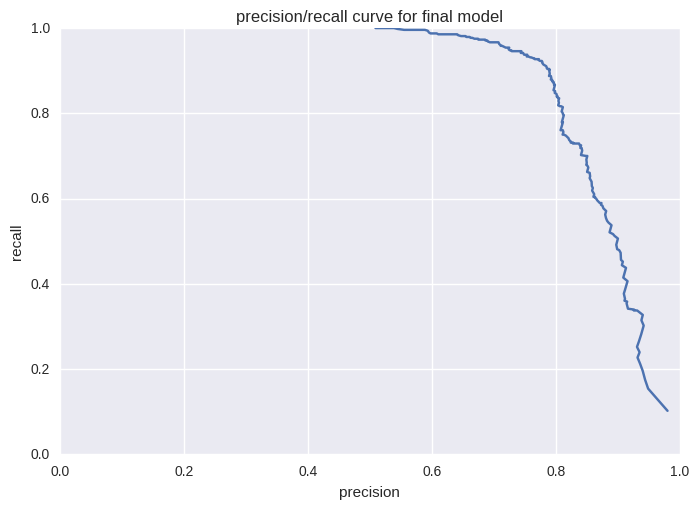

In [57]:
from sklearn.ensemble import RandomForestClassifier

result = RandomForestClassifier(n_estimators=300, max_features=3).fit(X=X_train, y=y_train)
pred_test = result.predict(X_test)

test_accuracy = sum(pred_test == y_test)/len(y_test)
print("Test accuracy = ", test_accuracy)
pred_probs = result.predict_proba(X_test)
pr_curve(y_test,pred_probs[:,1])

In [58]:
y_test_imp = y_test
pred_probs_fin2 = pred_probs

ROC Area Under the Curve (AUC) 0.889725071994


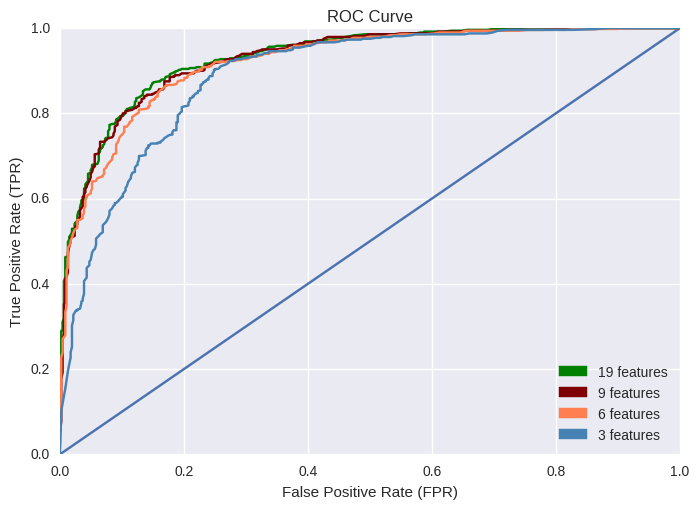

In [60]:
import matplotlib.patches as mpatches

fpr_all, tpr_all, thresholds = roc_curve(y_test_all,pred_probs_all[:,1])
fpr_imp, tpr_imp, thresholds = roc_curve(y_test_imp,pred_probs_imp[:,1])
fpr_fin, tpr_fin, thresholds = roc_curve(y_test_imp,pred_probs_fin[:,1])
fpr_fin2, tpr_fin2, thresholds = roc_curve(y_test_imp,pred_probs_fin2[:,1])
plt.plot([0,1],[0,1])
all_ = plt.plot(fpr_all, tpr_all, color='green');
imp_ = plt.plot(fpr_imp, tpr_imp, color='maroon');
fin_ = plt.plot(fpr_fin, tpr_fin, color='coral');
fin2_ = plt.plot(fpr_fin2, tpr_fin2, color='steelblue');



green_patch = mpatches.Patch(color='green', label='19 features')
maroon_patch = mpatches.Patch(color='maroon', label='9 features')
coral_patch = mpatches.Patch(color='coral', label='6 features')
steelblue_patch = mpatches.Patch(color='steelblue', label='3 features')

plt.legend(handles=[green_patch, maroon_patch, coral_patch, steelblue_patch], loc=4)
#plt.legend([all_, imp_, fin_], ['19 features', '9 features', '6 features'])
plt.title("ROC Curve")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)");
print('ROC Area Under the Curve (AUC)',roc_auc_score(y_test,pred_probs[:,1]))

In [49]:
importances = result.feature_importances_
std = np.std([tree.feature_importances_ for tree in result.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

impf = []

for f in range(X.shape[1]):
    impf.append(importances[indices[f]])
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

1. feature 4 (0.306868)
2. feature 1 (0.201909)
3. feature 2 (0.173740)
4. feature 5 (0.115380)
5. feature 3 (0.105009)
6. feature 6 (0.097094)
7. feature 0 (0.000000)


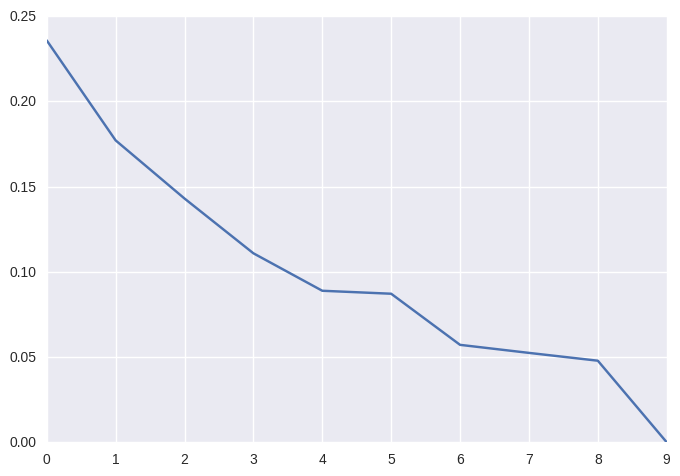

In [21]:
plt.plot(impf);

In [52]:
X.columns[2]

'p_marrfam'

In [9]:
feat['p_nat_citz'].isnull().sum()

14

In [12]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

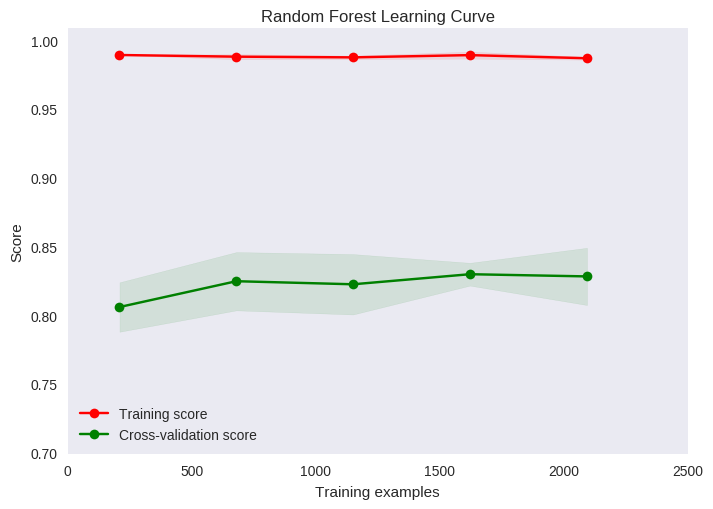

In [13]:
title = "Random Forest Learning Curve"

estimator = RandomForestClassifier()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=None, n_jobs=4);

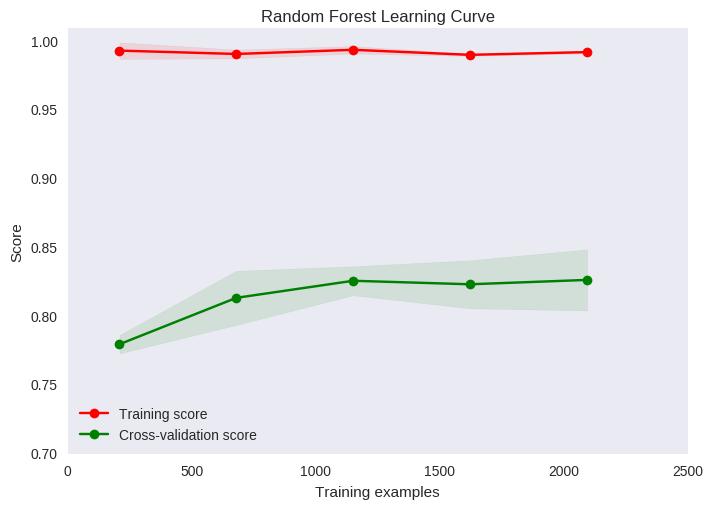

In [18]:
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=None, n_jobs=10);